In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the dataset
df=pd.read_csv("/content/drive/MyDrive/TFA/ANN/Regression/ATM_Cash_demand_forecast/atm bank dataset.csv")
df.head()

,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [4]:
df.shape

(2244, 11)

In [5]:
#for knowing statastical values
df.describe()

,id,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
mean,5706.037433,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,3348.296502,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,11.000000,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,2816.750000,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,5664.500000,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,8447.250000,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05
max,11585.000000,7.000000,12.000000,2017.000000,1.006829e+06,1.410700e+06


In [6]:
#check the datatype of each variable
df.dtypes

id                         int64
atm_name                  object
weekday                   object
festival_religion         object
working_day               object
holiday_sequence          object
trans_date_set             int64
trans_month                int64
trans_year                 int64
prevweek_mean              int64
total_amount_withdrawn     int64
dtype: object

In [7]:
#checking null values
df.isnull().sum()

id                        0
atm_name                  0
weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64

In [8]:
#drop 1st and 2nd column from the dataset
df = df.drop(df.columns[[0,1]], axis=1)

In [9]:
df.columns

Index(['weekday', 'festival_religion', 'working_day', 'holiday_sequence',
       'trans_date_set', 'trans_month', 'trans_year', 'prevweek_mean',
       'total_amount_withdrawn'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


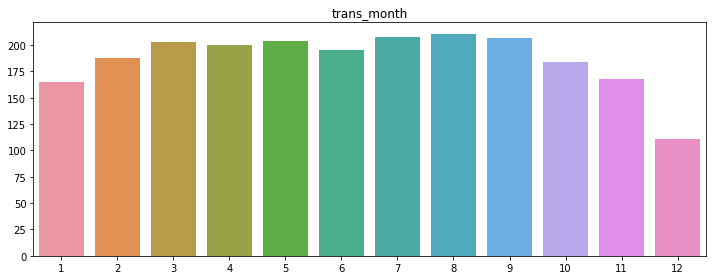

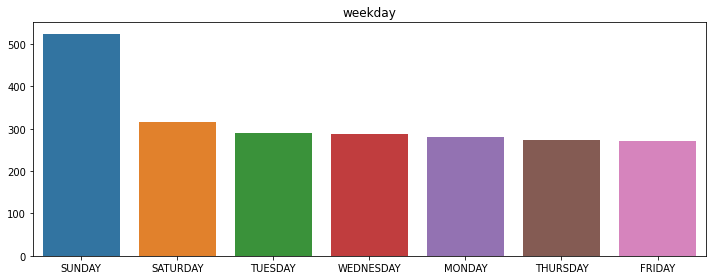

In [10]:
categorcial_variables = ['trans_month','weekday']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().index,df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()

In [11]:

#categorical to numerical
df=pd.get_dummies(df,columns=['weekday','festival_religion','working_day','holiday_sequence'])

In [12]:
df.shape


(2244, 27)

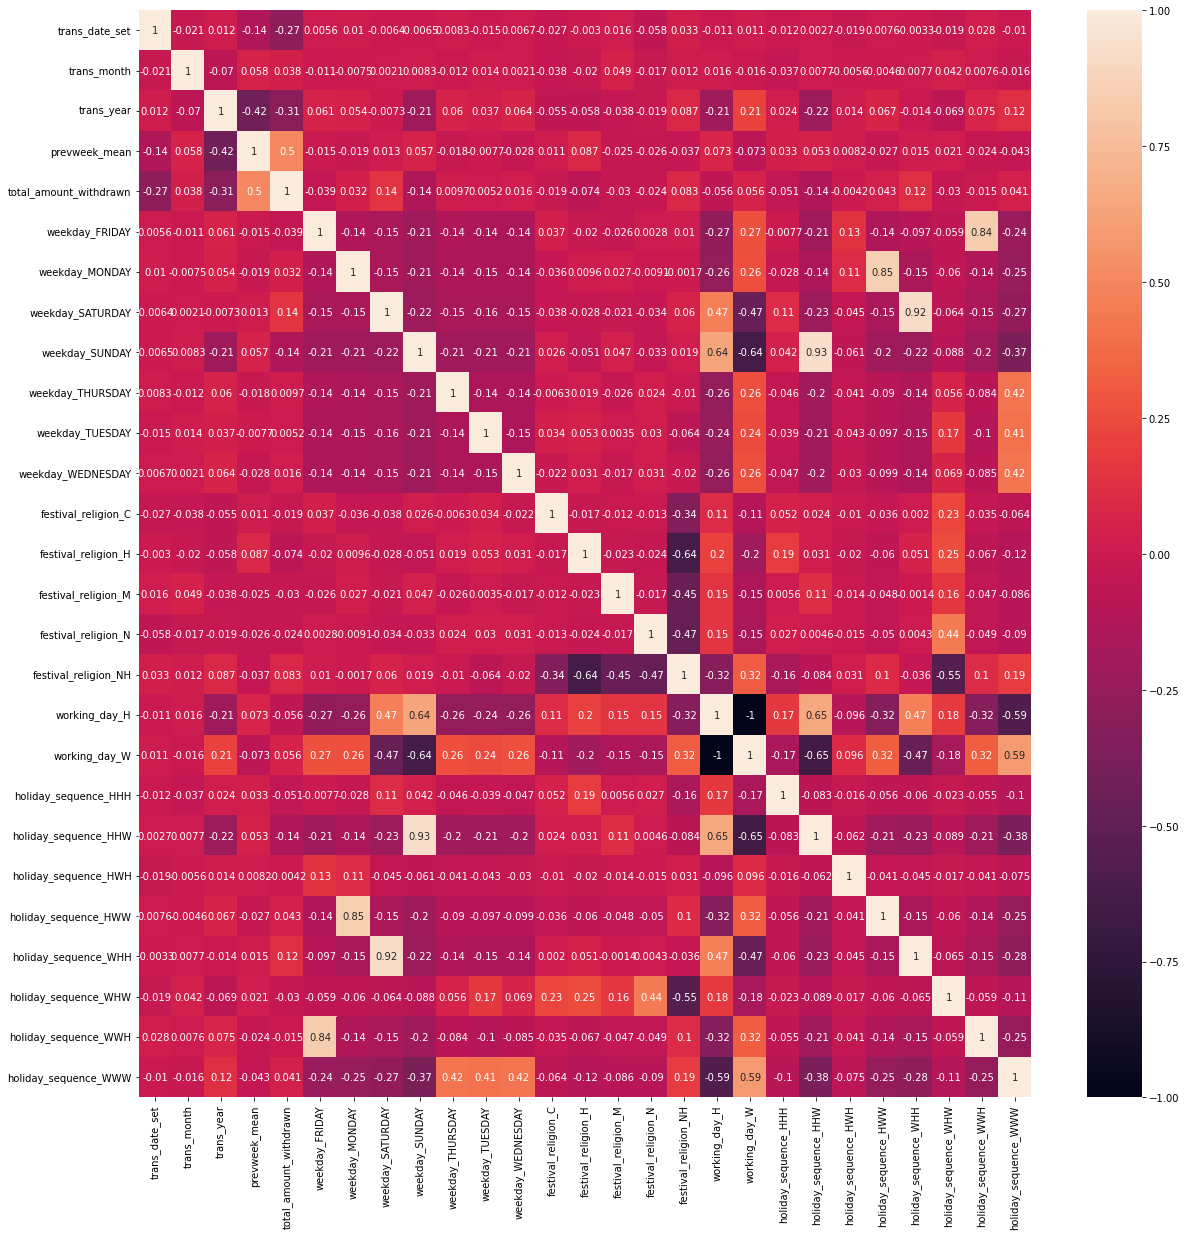

In [13]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [14]:
#selecting one feature amoung highly correlated varible
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df1 = df[selected_columns]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [16]:
x = df1.drop(columns = ['total_amount_withdrawn'])
y = df1['total_amount_withdrawn']


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(1795, 24) (449, 24) (1795,) (449,)


In [17]:

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [18]:

train_X_scaled = x_scaler.fit_transform(xtrain)

#val_X_scaled = x_scaler.transform(val_X)
test_X_scaled = x_scaler.transform(xtest)

In [21]:
train_y_scaled = y_scaler.fit_transform(ytrain.values.reshape(len(ytrain),1))

#val_y_scaled = y_scaler.transform(val_y)
test_y_scaled = y_scaler.transform(ytest.values.reshape(len(ytest),1))

In [22]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [23]:
# Expanding dimensions on axis 2 to get 31 x 1 matrices for n_examples
train_X_scaled = np.expand_dims(train_X_scaled, axis=2)
#val_X_scaled = np.expand_dims(val_X_scaled, axis=2)
test_X_scaled = np.expand_dims(test_X_scaled, axis=2)

In [25]:
print(train_X_scaled.shape) # 3767 examples 31 of 1 matrices.
#print(val_X_scaled.shape)
print(test_X_scaled.shape)

print(train_y_scaled.shape)
#print(val_y_scaled.shape)
print(test_y_scaled.shape)

(1795, 24, 1)
(449, 24, 1)
(1795, 1)
(449, 1)


In [45]:
n_inputs = train_X_scaled.shape[2]
n_outputs = train_y_scaled.shape[1] 

batch_size = 512
#steps_per_epoch = 50
epochs = 20

In [42]:
def build_model(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,activation='relu'))        
        model.add(Dense(1,activation='relu'))
        model.compile(loss='mse',optimizer='adam')
        return model

In [43]:
model = build_model([1,24, 1795])

In [47]:
model.fit(
    train_X_scaled,
    train_y_scaled,
    batch_size=batch_size,
    epochs=epochs,
    #steps_per_epoch=steps_per_epoch,
    #verbose=0
    )

Epoch 1/20
4/4 [==============================] - 2s 409ms/step - loss: 0.0324
Epoch 2/20
4/4 [==============================] - 2s 412ms/step - loss: 0.0325
Epoch 3/20
4/4 [==============================] - 2s 411ms/step - loss: 0.0323
Epoch 4/20
4/4 [==============================] - 2s 402ms/step - loss: 0.0323
Epoch 5/20
4/4 [==============================] - 2s 409ms/step - loss: 0.0324
Epoch 6/20
4/4 [==============================] - 2s 408ms/step - loss: 0.0325
Epoch 7/20
4/4 [==============================] - 2s 401ms/step - loss: 0.0322
Epoch 8/20
4/4 [==============================] - 2s 400ms/step - loss: 0.0314
Epoch 9/20
4/4 [==============================] - 2s 413ms/step - loss: 0.0319
Epoch 10/20
4/4 [==============================] - 2s 406ms/step - loss: 0.0320
Epoch 11/20
4/4 [==============================] - 2s 411ms/step - loss: 0.0319
Epoch 12/20
4/4 [==============================] - 2s 412ms/step - loss: 0.0319
Epoch 13/20
4/4 [==============================] 

In [50]:
from sklearn import metrics
y_pred = model.predict(test_X_scaled)
MAE_NN=metrics.mean_absolute_error(test_y_scaled, y_pred)
MSE_NN=metrics.mean_squared_error(test_y_scaled, y_pred)
RMSE_NN=np.sqrt(metrics.mean_squared_error(test_y_scaled, y_pred))
print(MAE_NN)
print(MSE_NN)
print(RMSE_NN)

0.14824685812206662
0.03439551312569665
0.1854602737129886


In [ ]:

# Importing the Keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Initializing the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(25, activation = 'relu', input_dim = 24))
# Adding the 2 hidden layer
classifier.add(Dense(20, activation = 'relu'))
# Adding the 3 hidden layer
classifier.add(Dense(15, activation = 'relu'))
# Adding the 4 hidden layer
classifier.add(Dense(8,  activation = 'relu'))
# Adding the output layer
classifier.add(Dense(1, activation = 'linear'))
# Adding the output layer
#classifier.add(Dense(1, activation = 'linear'))
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'mse')
# Fitting the ANN to the Training set
classifier.fit(xtrain, ytrain, batch_size=100,epochs = 500)
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(xtest)

Epoch 1/500
18/18 [==============================] - 1s 2ms/step - loss: 174288502784.0000
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 80397950976.0000
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 52211564544.0000
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 52598583296.0000
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 52073926656.0000
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 52139102208.0000
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 52105609216.0000
Epoch 8/500
18/18 [==============================] - 0s 2ms/step - loss: 52051103744.0000
Epoch 9/500
18/18 [==============================] - 0s 2ms/step - loss: 52126703616.0000
Epoch 10/500
18/18 [==============================] - 0s 2ms/step - loss: 52105641984.0000
Epoch 11/500
18/18 [==============================] - 0s 2ms/step - loss: 52140630016.0000
Epoch 1

In [ ]:
from sklearn import metrics

MAE_NN=metrics.mean_absolute_error(ytest, y_pred)
MSE_NN=metrics.mean_squared_error(ytest, y_pred)
RMSE_NN=np.sqrt(metrics.mean_squared_error(ytest, y_pred))
print(MAE_NN)
print(MSE_NN)
print(RMSE_NN)

168680.78840130847
47958578907.94444
218994.47232280645


In [ ]:
xtrain.shape

(1795, 24)

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 24)))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer='adam', loss='mse')

In [ ]:
import pandas as pd
import numpy as np
import math

from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
csv_path = '/content/drive/MyDrive/TFA/ANN/Regression/ATM_Cash_demand_forecast/atm bank dataset.csv'

data = pd.read_csv(csv_path)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      2244 non-null   int64 
 1   atm_name                2244 non-null   object
 2   weekday                 2244 non-null   object
 3   festival_religion       2244 non-null   object
 4   working_day             2244 non-null   object
 5   holiday_sequence        2244 non-null   object
 6   trans_date_set          2244 non-null   int64 
 7   trans_month             2244 non-null   int64 
 8   trans_year              2244 non-null   int64 
 9   prevweek_mean           2244 non-null   int64 
 10  total_amount_withdrawn  2244 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 193.0+ KB
